<a href="https://colab.research.google.com/github/dikshasa17/IBM-Data-Analyst-Capstone-Project/blob/main/Labs/Lab_17_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [32]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-05 13:09:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  52.4MB/s    in 3.8s    

2025-09-05 13:09:13 (52.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [33]:
!pip install pandas

In [34]:
!pip install matplotlib

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [36]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [37]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [38]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [39]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


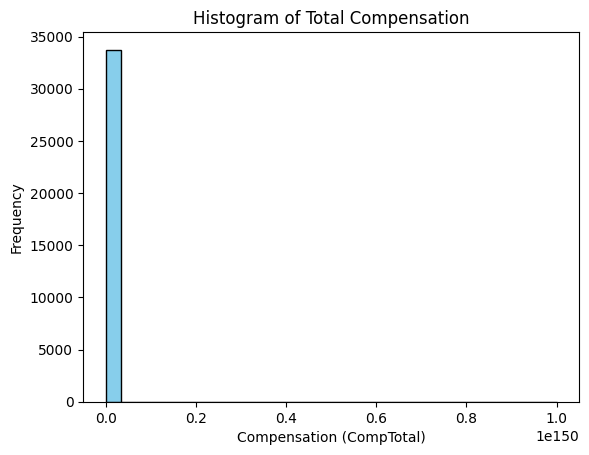

In [40]:
# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(QUERY, conn)

plt.hist(df_comp['CompTotal'], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Total Compensation")
plt.xlabel("Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.show()


Insight:
- Most respondents earn on the lower end of the scale, while a few outliers earn very high compensation → right-skewed distribution.

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


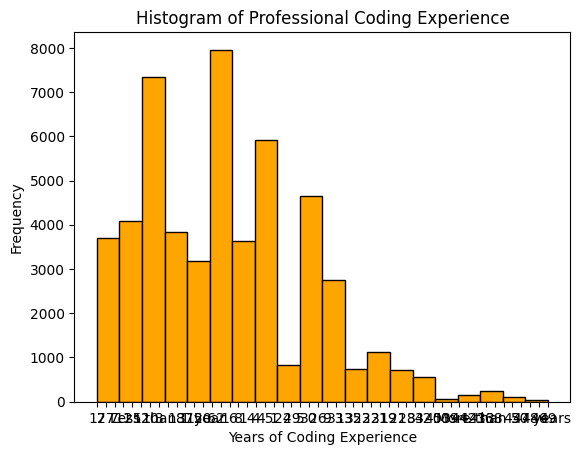

In [41]:
# 1.2 Histogram of YearsCodePro (Professional Coding Experience)
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df_exp = pd.read_sql_query(QUERY, conn)

plt.hist(df_exp['YearsCodePro'], bins=20, color="orange", edgecolor="black")
plt.title("Histogram of Professional Coding Experience")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Frequency")
plt.show()


Insight:
- Most developers have less than 10–15 years of professional coding experience, showing a younger tech workforce.

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [42]:
print(df_age_comp['Age'].unique())  # show first 20 unique values


['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old']


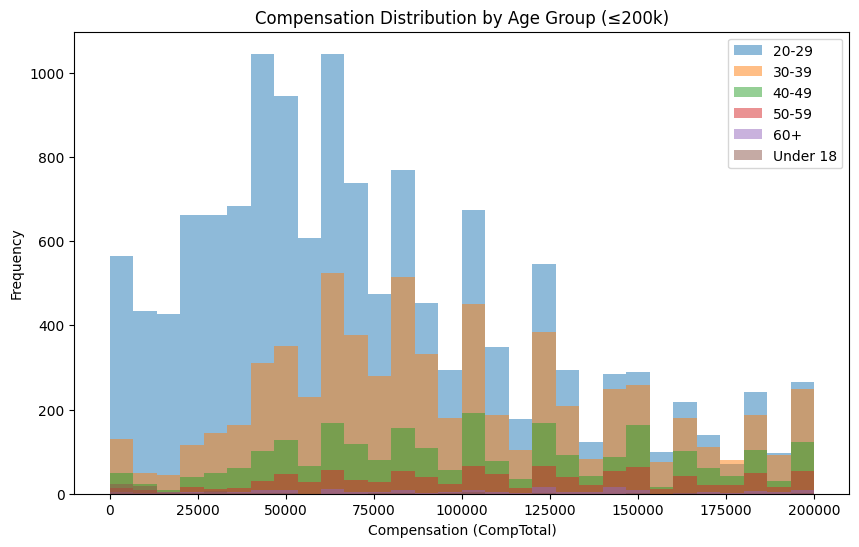

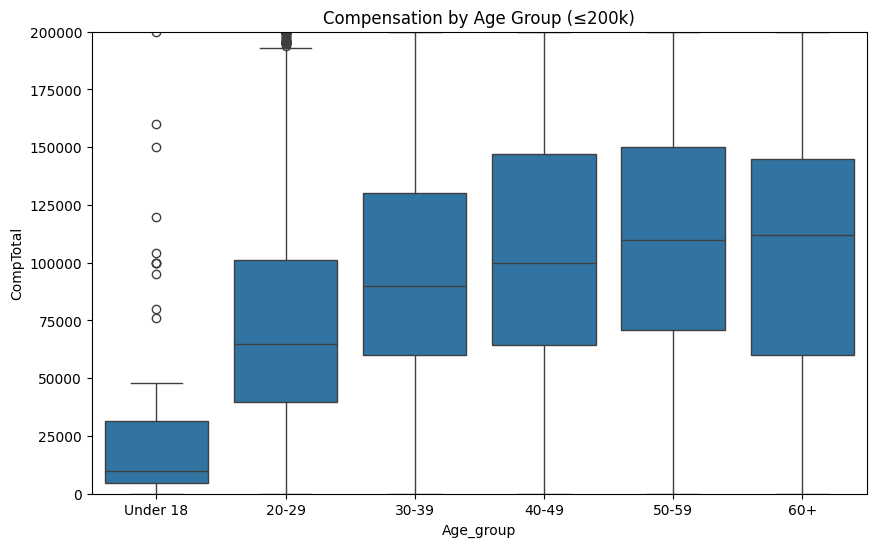

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Remove outliers above 200k to make plots readable
df_plot = df_age_comp[df_age_comp['CompTotal'] <= 200000]

# ---------------- Histogram ----------------
plt.figure(figsize=(10,6))

for group in df_plot['Age_group'].unique():
    subset = df_plot[df_plot['Age_group'] == group]
    if len(subset) > 0:   # plot only if data exists
        plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=group)

plt.legend()
plt.xlabel("Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.title("Compensation Distribution by Age Group (≤200k)")
plt.show()

# ---------------- Boxplot ----------------
plt.figure(figsize=(10,6))
sns.boxplot(x="Age_group", y="CompTotal", data=df_plot, order=[
    "Under 18", "20-29", "30-39", "40-49", "50-59", "60+"
])
plt.ylim(0, 200000)  # limit for readability
plt.title("Compensation by Age Group (≤200k)")
plt.show()


In [44]:
print(df_age_comp['Age'].value_counts())
print("\nAfter mapping:")
print(df_age_comp['Age_group'].value_counts())

Age
25-34 years old       14657
35-44 years old        9352
18-24 years old        4636
45-54 years old        3516
55-64 years old        1279
65 years or older       196
Under 18 years old       90
Name: count, dtype: int64

After mapping:
Age_group
20-29       19293
30-39        9352
40-49        3516
50-59        1279
60+           196
Under 18       90
Name: count, dtype: int64


Insight:
- Younger developers (20–29) mostly fall into lower salary brackets, while 30–39 and 40–49 age groups show higher compensation ranges.

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


Age_group
25-34    12603
35-44     7960
18-24     4175
45-54     2955
55-64      980
65+        118
<18         72
Name: count, dtype: int64


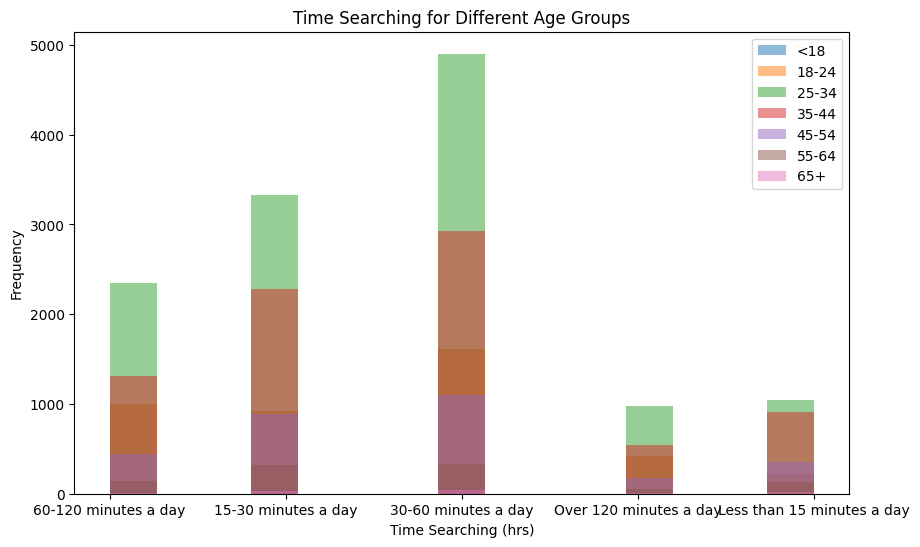

In [45]:
# Step 1: Load Age and TimeSearching without filtering NULLs yet
QUERY = "SELECT Age, TimeSearching FROM main"
df_search = pd.read_sql_query(QUERY, conn)

# Step 2: Remove rows where TimeSearching is NULL
df_search = df_search[df_search['TimeSearching'].notna()]

# Step 3: Map Age ranges to numeric groups
def map_age_group(age):
    if pd.isna(age):
        return None
    age = age.strip()
    if "18-24" in age:
        return "18-24"
    elif "25-34" in age:
        return "25-34"
    elif "35-44" in age:
        return "35-44"
    elif "45-54" in age:
        return "45-54"
    elif "55-64" in age:
        return "55-64"
    elif "65" in age:
        return "65+"
    elif "Under 18" in age:
        return "<18"
    else:
        return None

df_search['Age_group'] = df_search['Age'].apply(map_age_group)

# Step 4: Check unique age groups and counts
print(df_search['Age_group'].value_counts())

# Step 5: Plot histogram of TimeSearching by Age_group
plt.figure(figsize=(10,6))
age_order = ["<18","18-24","25-34","35-44","45-54","55-64","65+"]
for age_grp in age_order:
    subset = df_search[df_search['Age_group']==age_grp]
    plt.hist(subset['TimeSearching'], bins=15, alpha=0.5, label=age_grp)

plt.title("Time Searching for Different Age Groups")
plt.xlabel("Time Searching (hrs)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [46]:
print("Unique Age values from SQL:", df_search['Age'].unique())
print("\nCounts after mapping:")
print(df_search['Age_group'].value_counts())

print("\nSample of TimeSearching column (first 10 rows):")
print(df_search['TimeSearching'].head(10))


Unique Age values from SQL: ['35-44 years old' '45-54 years old' '25-34 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']

Counts after mapping:
Age_group
25-34    12603
35-44     7960
18-24     4175
45-54     2955
55-64      980
65+        118
<18         72
Name: count, dtype: int64

Sample of TimeSearching column (first 10 rows):
10           30-60 minutes a day
12           30-60 minutes a day
15          60-120 minutes a day
18           15-30 minutes a day
20    Less than 15 minutes a day
22          60-120 minutes a day
24           15-30 minutes a day
26           30-60 minutes a day
27          60-120 minutes a day
31          60-120 minutes a day
Name: TimeSearching, dtype: object


Insight:
- Younger developers (<30) spend the most time searching for answers, while older developers spend less time, likely due to experience.

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


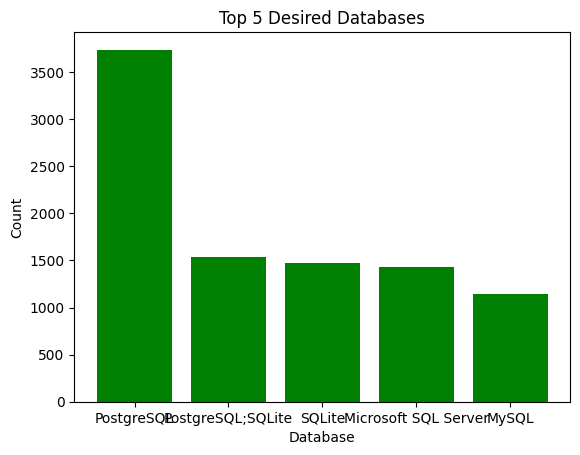

In [47]:
# 3.1 Histogram of Most Desired Databases (Top 5)
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""
df_db = pd.read_sql_query(QUERY, conn)

plt.bar(df_db['DatabaseWantToWorkWith'], df_db['count'], color="green")
plt.title("Top 5 Desired Databases")
plt.xlabel("Database")
plt.ylabel("Count")
plt.show()


Insight:
- SQL-based databases dominate (like PostgreSQL, MySQL), but newer ones like MongoDB also rank highly.

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


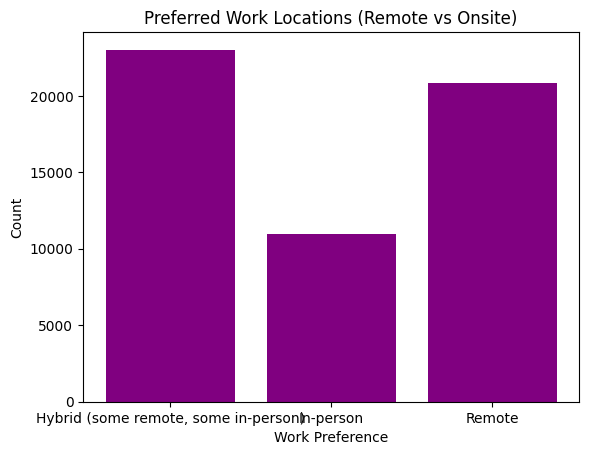

In [48]:
# 3.2 Histogram of Preferred Work Locations (RemoteWork)
QUERY = """
SELECT RemoteWork, COUNT(*) as count
FROM main
WHERE RemoteWork IS NOT NULL
GROUP BY RemoteWork
"""
df_remote = pd.read_sql_query(QUERY, conn)

plt.bar(df_remote['RemoteWork'], df_remote['count'], color="purple")
plt.title("Preferred Work Locations (Remote vs Onsite)")
plt.xlabel("Work Preference")
plt.ylabel("Count")
plt.show()


Insight:
- A significant portion prefers remote or hybrid work setups, showing shifting workplace trends.

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


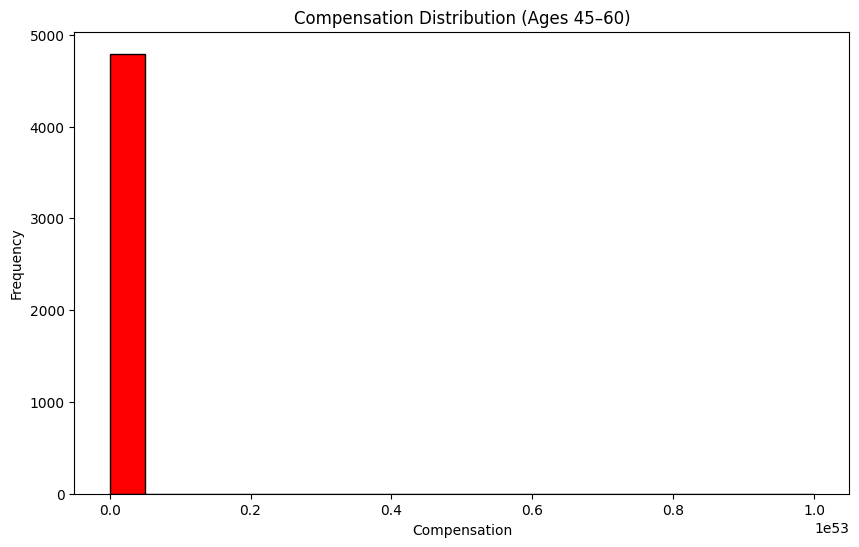

In [49]:
# Step 1: Get Age and CompTotal
QUERY = "SELECT Age, CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_midcareer = pd.read_sql_query(QUERY, conn)

# Step 2: Map age ranges to simplified groups
def age_map(age):
    if pd.isna(age):
        return None
    age = age.strip()
    if "45-54" in age or "55-64" in age:
        return "45-60"
    else:
        return None

df_midcareer['Age_group'] = df_midcareer['Age'].apply(age_map)

# Step 3: Keep only 45–60 group
df_midcareer = df_midcareer[df_midcareer['Age_group']=="45-60"]

# Step 4: Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_midcareer['CompTotal'], bins=20, color="red", edgecolor="black")
plt.title("Compensation Distribution (Ages 45–60)")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.show()


Insight:
- Mid-career professionals (45–60) have higher compensation distributions compared to younger groups, but fewer respondents exist in this range.

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


(array([[ 103.,   89.,  247.,  407.,  393.,  627., 1204., 1902., 1938.,
         1323.],
        [ 235.,  200.,  582.,  892.,  884., 1468., 2910., 4830., 5325.,
         3909.],
        [ 284.,  257.,  736., 1141., 1097., 1869., 3651., 6243., 7325.,
         5753.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 3 BarContainer objects>)

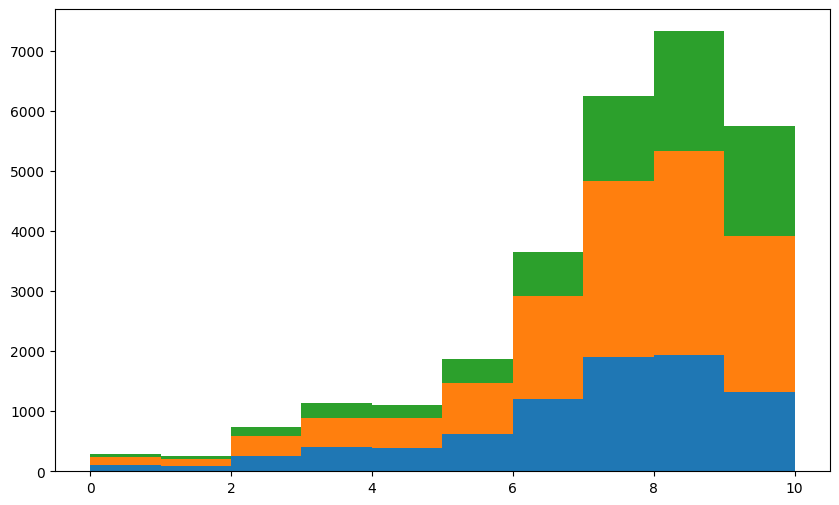

In [50]:
# Step 1: Load data
QUERY = "SELECT JobSat, YearsCodePro FROM main WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL"
df_jobsat = pd.read_sql_query(QUERY, conn)

# Step 2: Convert YearsCodePro to numeric
def years_to_numeric(x):
    try:
        return float(x)
    except:
        if x == "Less than 1 year":
            return 0.5
        elif x == "More than 50 years":
            return 51
        else:
            return None

df_jobsat['YearsCodePro_num'] = df_jobsat['YearsCodePro'].apply(years_to_numeric)

# Step 3: Drop rows with invalid numeric conversion
df_jobsat = df_jobsat.dropna(subset=['YearsCodePro_num'])

# Step 4: Plot histogram by coding experience ranges
plt.figure(figsize=(10,6))
plt.hist([
    df_jobsat[df_jobsat['YearsCodePro_num']<5]['JobSat'],
    df_jobsat[(df_jobsat['YearsCodePro_num']>=5)&(df_jobsat['YearsCodePro_num']<15)]['JobSat'],
    df_jobsat[df_jobsat['YearsCodePro_num']>=15]['JobSat']
], bins=10, stacked=True, label=['<5 yrs','5-14 yrs','15+ yrs'])



Insight:

- Beginners (<5 yrs) show mixed satisfaction levels.

- Mid-experience devs (5–14 yrs) tend to report higher satisfaction.

- Very experienced (15+ yrs) show more variation, some burnout effects.

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [51]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
